# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


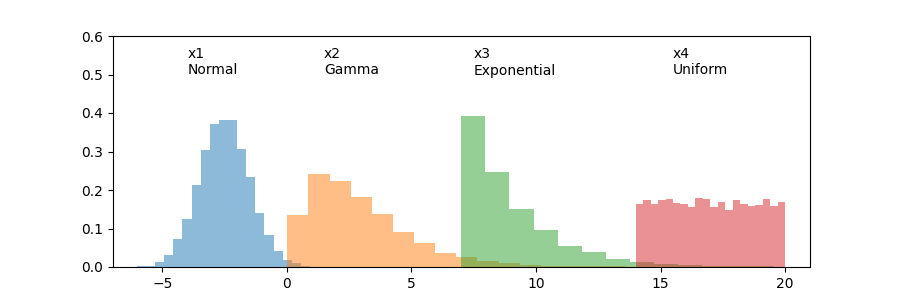

Text(15.480260029696165, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
# plt.hist(x1, normed=True, bins=20, alpha=0.5)
# plt.hist(x2, normed=True, bins=20, alpha=0.5)
# plt.hist(x3, normed=True, bins=20, alpha=0.5)
# plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);

plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


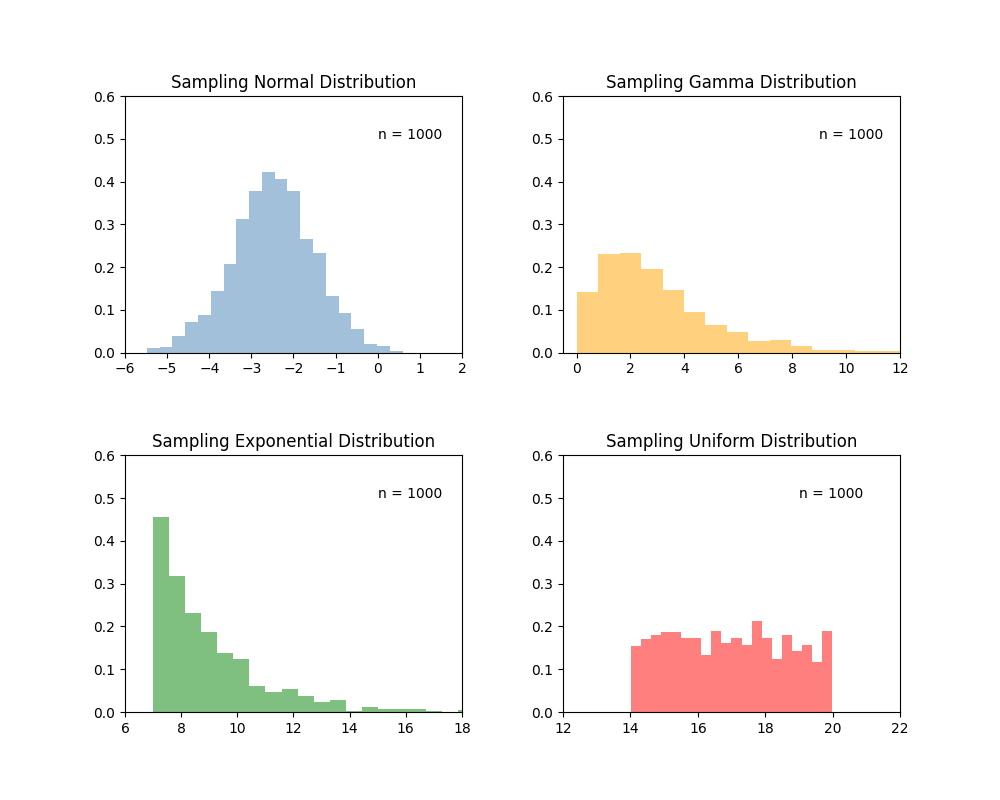

In [27]:
from matplotlib import gridspec
from matplotlib import animation


fig = plt.figure(figsize=[10, 8])
gspec = gridspec.GridSpec(2, 2, wspace=0.3, hspace=0.4)
top_left = plt.subplot(gspec[0, 0])
top_right = plt.subplot(gspec[0, 1])
bottom_left = plt.subplot(gspec[1, 0])
bottom_right = plt.subplot(gspec[1, 1])
n = 1000

def update_fig(frame):
    if frame == n:
        a.event_source.stop()

    top_left.clear()
    top_left.set_xlim(-6, 2)
    top_left.annotate('n = {}'.format(frame), [0, 0.5])
    top_left.hist(x1[:frame], density=True, bins=20, alpha=0.5, color='steelblue')
    top_left.set_title("Sampling Normal Distribution")
    
    top_right.cla()
    top_right.set_xlim(-0.5, 12)
    top_right.annotate('n = {}'.format(frame), [9, 0.5])
    top_right.hist(x2[:frame], density=True, bins=20, alpha=0.5, color='orange')
    top_right.set_title("Sampling Gamma Distribution")
    
    bottom_left.cla()
    bottom_left.set_xlim(6, 18)
    bottom_left.annotate('n = {}'.format(frame), [15, 0.5])
    bottom_left.hist(x3[:frame], density=True, bins=20, alpha=0.5, color='green')
    bottom_left.set_title("Sampling Exponential Distribution")
    
    bottom_right.clear()
    bottom_right.set_xlim(12, 22)
    bottom_right.annotate('n = {}'.format(frame), [19, 0.5])
    bottom_right.hist(x4[:frame], density=True, bins=20, alpha=0.5, color='red')
    bottom_right.set_title("Sampling Uniform Distribution")

    for ax in [top_left, top_right, bottom_left, bottom_right]:
        ax.set_ylim(0, 0.6)


a = animation.FuncAnimation(fig, update_fig, interval=10, frames=range(100, 1001))
a.save('probability distribution animation.mp4')

<IPython.core.display.Javascript object>


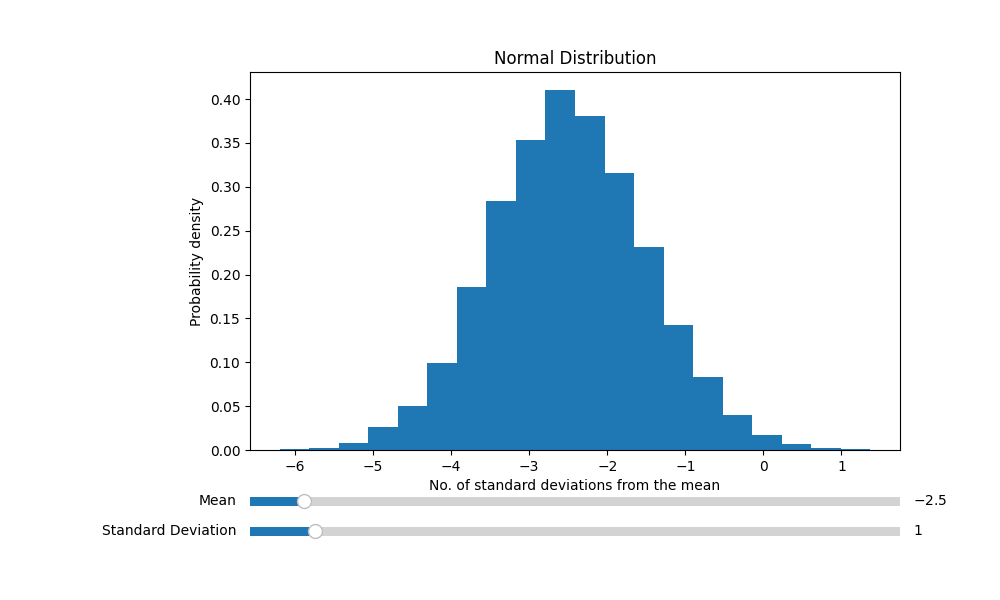

0

In [23]:
from matplotlib.widgets import Slider, Button

# initial parameters
init_mean = -2.5
init_std = 1

fig, ax = plt.subplots(figsize=(10,6))
x1 = np.random.normal(init_mean, init_std, 10000)
hist = ax.hist(x1, bins=20, density=True)
ax.set_title('Normal Distribution')
ax.set_xlabel('No. of standard deviations from the mean')
ax.set_ylabel('Probability density')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the mean.
ax_mean = fig.add_axes([0.25, 0.15, 0.65, 0.03])
mean_slider = Slider(
    ax=ax_mean,
    label='Mean',
    valmin=-3,
    valmax=3,
    valinit=init_mean,
)
ax_std = fig.add_axes([0.25, 0.1, 0.65, 0.03])
std_slider = Slider(
    ax=ax_std,
    label='Standard Deviation',
    valmin=0,
    valmax=10,
    valinit=init_std,
)



def update(val):
    x1 = np.random.normal(mean_slider.val, std_slider.val, 10000)
    ax.cla()
    ax.hist(x1, bins=20, density=True)
    ax.set_title('Normal Distribution')
    ax.set_xlabel('No. of standard deviations from the mean')
    ax.set_ylabel('Probability density')
    
mean_slider.on_changed(update)
std_slider.on_changed(update)
